### **Importing the data and required modules**

In [416]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [417]:
loans_data = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

In [418]:
loans_data.drop(['Unnamed: 0', 'desc','url'], axis = 1, inplace = True)
#loans_data.drop(loans_data.columns['Unnamed: 0'], axis = 1, inplace = True)

In [419]:
pd.options.display.max_columns = None

In [420]:
loans_data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [421]:
print(loans_data.shape)
loans_data.info()

(466285, 72)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null 

In [422]:
loans = loans_data.copy()

<br>

### **Data Wrangling and Pre-processing**

##### **Pre-processing: Employment Length**

The variable `emp_length` for employment length in years has a string formatting. We need to first convert it into numerical values before we can make use of it in the modelling process.

In [423]:
loans['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [424]:
# Strip away string characters
loans['emp_length_int'] = loans['emp_length'].str.replace('+ years', '')
loans['emp_length_int'] = loans['emp_length_int'].str.replace('< 1 year', str(0))
loans['emp_length_int'] = loans['emp_length_int'].str.replace('n/a', str(0))
loans['emp_length_int'] = loans['emp_length_int'].str.replace('years', '')
loans['emp_length_int'] = loans['emp_length_int'].str.replace(' year', '')

# Examine unique values after stripping
loans['emp_length_int'].unique()

array(['10', '0', '1', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ', '7 ',
       nan], dtype=object)

After stripping the string characters from the diffrent employment categories, we need to convert them into a numeric data type.

In [425]:
loans['emp_length_int'] = pd.to_numeric(loans['emp_length_int'])

In [426]:
type(loans['emp_length_int'][0])

numpy.float64

<br>

##### **Pre-Processing: Date of Earliest Credit Line**

The date format for the variable on earliest credit line data (`earliest_cr_line`) needs to be formatted.

In [427]:
# Sample data formats
loans['earliest_cr_line'].unique()[:10]

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04'], dtype=object)

In [428]:
loans['earliest_cr_line_date'] = pd.to_datetime(loans['earliest_cr_line'], format = '%b-%y')

In [429]:
# Convert with manual adjustment for years
def fix_year(x):
    date = pd.to_datetime(x, format='%b-%y')
    if date.year > 2023:  # Adjust if year is in the future
        date = date.replace(year=date.year - 100)
    return date

loans['earliest_cr_line_date'] = loans['earliest_cr_line_date'].apply(fix_year)

Time difference in months

In [430]:
ref_date = pd.to_datetime('2017-12-31')
loans['mths_since_earliest_cr_line'] = (ref_date - loans['earliest_cr_line_date']).dt.days // 30

In [431]:
loans['mths_since_earliest_cr_line'].describe().round(2)

count    466256.00
mean        246.55
std          88.21
min          75.00
25%         187.00
50%         230.00
75%         290.00
max         900.00
Name: mths_since_earliest_cr_line, dtype: float64

<br>

<br>

##### **Pre-Processing: Variable: "Term"**

In [432]:
loans['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [433]:
loans['term_int'] = pd.to_numeric(loans['term'].str.replace(' months',''))

#### Preprocessing Variable "issue_date"

In [434]:
loans['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [435]:
# First format issue date
loans['formatted_issue_d'] = pd.to_datetime(loans['issue_d'], format = '%b-%y')

# Subtract
ref_date = pd.to_datetime('2017-12-31')
loans['mths_since_issue_d'] = (ref_date - loans['formatted_issue_d']).dt.days // 30
loans['mths_since_issue_d'].describe()

count    466285.000000
mean         52.377947
std          14.601819
min          37.000000
25%          42.000000
50%          48.000000
75%          58.000000
max         128.000000
Name: mths_since_issue_d, dtype: float64

<br>
<br>

### **Checking for Missing Values**

In [436]:
pd.options.display.max_rows = None

In [437]:
loans.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
purpose                             0
title                              21
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_l

In [438]:
loans['total_rev_hi_lim'].isna().sum()

np.int64(70276)

In [439]:
loans['total_rev_hi_lim'] = loans['total_rev_hi_lim'].fillna(loans['funded_amnt'])

In [440]:
loans['total_rev_hi_lim'].isnull().sum()

np.int64(0)

We also impute the following variables with missing values with zero:

In [441]:
loans['emp_length_int'] = loans['emp_length_int'].fillna(0)
loans['mths_since_earliest_cr_line'] = loans['mths_since_earliest_cr_line'].fillna(0)

<br>

As we intend to use **months_since_last_delinq** and **months_since_last_record** in LGD and EAD modelling, we will impute missing values of both of these two variables to zero.

In [442]:
loans['mths_since_last_delinq'] = loans['mths_since_last_delinq'].fillna(0)
loans['mths_since_last_record'] = loans['mths_since_last_record'].fillna(0)

### **Re-coding dependent variable**

First we explore

In [443]:
loans['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Next we check the distribution of the values

In [444]:
loans['loan_status'].value_counts(normalize = True).round(2)

loan_status
Current                                                0.48
Fully Paid                                             0.40
Charged Off                                            0.09
Late (31-120 days)                                     0.01
In Grace Period                                        0.01
Does not meet the credit policy. Status:Fully Paid     0.00
Late (16-30 days)                                      0.00
Default                                                0.00
Does not meet the credit policy. Status:Charged Off    0.00
Name: proportion, dtype: float64

We now utilise the following classifications as indicators for a bad loan (coded as 1). The rest of the indicators will indicate a healthy loan (coded as 0).

In [445]:
loans['good_bad'] = np.where(loans['loan_status'].isin(['Charged Off',
                                                        'Default', 
                                                        'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']),1,0)

<br>

#### Exporting Pre-processed Data

In [446]:
loans.to_csv('loans_preprocessed.csv')

</br>
</br>

 

### **Splitting the data into training/testing sets**

#### Splitting the data

We split the data into a training set and test set. Each will include a matrix of explanatory variables (x) and one outcome variable(y). We split the data with 80%:20% distribution.


In [447]:
X = loans.drop('good_bad', axis = 1)
y = loans['good_bad']

In [448]:
train_size = int(np.ceil(loans.shape[0]*0.8)) # training set 80% of data
np.random.seed(123)
train_select = np.random.permutation(range(len(y))) #shaking the numbers from 1-n

# We will not drop the index when splitting data as this will be needed when calculating ECL (matching with LGD and EAD data)
X_train = X.iloc[train_select[:train_size],:] # Select records up to train_size (N_train)
X_test = X.iloc[train_select[train_size:],:] # Select records from N_train till the end
y_train = y[train_select[:train_size]]
y_test = y[train_select[train_size:]]

In [449]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(373028, 78)
(373028,)
(93257, 78)
(93257,)


<br>

## **Preperation of predictors- Weight of Evidence and Information Value**

The pre-processing a variable is usually comprised of the following steps:
- Fine-classing the variable into categorical bins *(This is only requried for continuous variables)*.
- Calculating the Weight of Evidence (WoE) associated with each of the generated categories.
- Coarse-classing the generated categories into fewer categories with similar weight of evidence (WoE).
- Creating dummy variables based on the final categories of the coarse-classed variable.

In the case of categorical variables, we only need to worry about steps 2 and 3 since the variable is already categorical.

<br>

***Creating WoE and Information Value***

To calculate the inforation value for a discrete variable, we creat the following function which:
- Creates a summary for any discrete variable showing each category of the variable along with the associated WoE.
- Calculates the Information Value (IV) associated with the variable.
- Sorts the resulting table by WoE which will be usefull in plotting and coarse_classing.

### **Processing Discrete Variables**

In [450]:
def woe_discrete(df_X, var, target_df):
    df = pd.concat([df_X[var], target_df], axis = 1)
    df = df.groupby(var, as_index=False).agg(
        n = ('good_bad', lambda x: x.count()), # count of observations per category
        prop_n = ('good_bad', lambda x: x.count()/len(df[var])), # proportion of observations in category to total
        good_count=('good_bad', lambda x: (x == 0).sum()), # count of good in category X
        bad_count=('good_bad', lambda x: (x == 1).sum()), # count of bad in category x
        prop_good = ('good_bad', lambda x: (x == 0).sum() / sum(df.good_bad == 0)), # proportion of good in category x to all good
        prop_bad = ('good_bad', lambda x: (x == 1).sum()/ sum(df.good_bad == 1)) # proportion of bad in category x to all bad
    )

    df['WoE'] = np.log(df.prop_good / df.prop_bad) # Calculating WoW ln(%good / %bad)
    df = df.sort_values(by = 'WoE').reset_index(drop = True) #sorting by WoE
    df['diff_prop_good'] = df['prop_good'].diff().abs() # absolute diff in %good
    df['diff_woe'] = df['WoE'].diff().abs() # absolute diff in WoE
    
     # IV = Sum[ (%good - % bad) * WoE ]
    df['IV'] = (df.prop_good - df.prop_bad)* df.WoE
    df['IV'] = sum(df.IV)

    return(df.round(4))


We also create a plotting function with which we can analyse the trend for the WoE throughout the different buckets of the predictor variable.

In [451]:
def plot_woe(df_woe, x_axis_rotation = 0):
    plt.figure(figsize = (12, 4))
    plt.plot(df_woe[df_woe.columns.values[0]], df_woe.WoE, linestyle = '--', color = 'k', marker = 'o')
    plt.xlabel(df_woe.columns.values[0])
    plt.ylabel('WoE')
    plt.title('WoE by ' + df_woe.columns.values[0])
    plt.xticks(rotation = x_axis_rotation)

<br>

#### **Processing: Grade Variable (Discrete)**

We first examine how many categories are included in Grade variable.

In [452]:
X_train.grade.unique()

array(['B', 'C', 'D', 'A', 'E', 'F', 'G'], dtype=object)

We now use our **woe_discrete()** function to generate WoE and IV calculations for the **grade** variable.

In [453]:
df_temp = woe_discrete(X_train, 'grade', y_train)
df_temp

,grade,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,G,2643,0.0071,1893,750,0.0057,0.0184,-1.1721,NaN,NaN,0.2892
1,F,10589,0.0284,8017,2572,0.0241,0.0631,-0.9611,0.0184,0.2110,0.2892
2,E,28657,0.0768,23124,5533,0.0696,0.1357,-0.6679,0.0455,0.2933,0.2892
3,D,61582,0.1651,52098,9484,0.1568,0.2326,-0.3945,0.0872,0.2734,0.2892
4,C,100292,0.2689,88826,11466,0.2673,0.2812,-0.0507,0.1105,0.3438,0.2892
5,B,109397,0.2933,100752,8645,0.3032,0.2120,0.3577,0.0359,0.4084,0.2892
6,A,59868,0.1605,57549,2319,0.1732,0.0569,1.1135,0.1300,0.7558,0.2892


We use our plotting function to check whether the WoE trend is monotonously increasing or decreasing. This variable has only few category and achieves the motonocity requirements fairly well. Hence, there is no need to do coarse_classing of its categories.

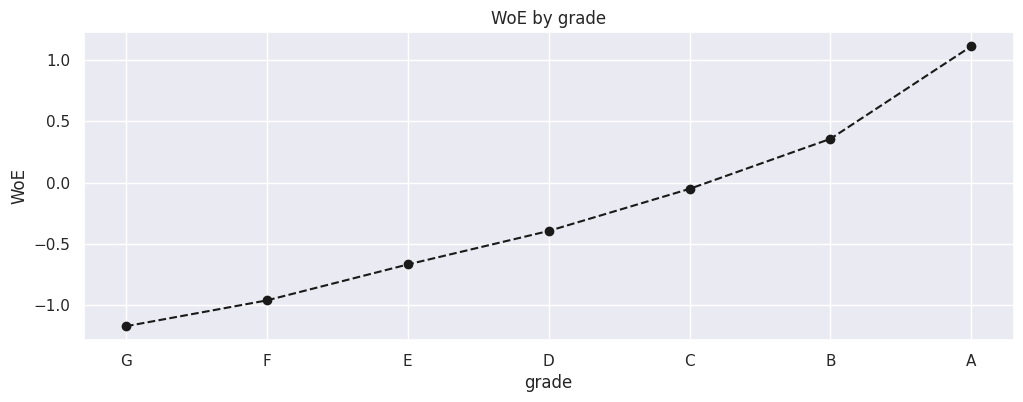

In [454]:
plot_woe(df_temp)

Finally, we can add dummy variables to our training data for each of the categories of the variable grade.

In [455]:
grade_train_dummies = pd.get_dummies(X_train['grade'], prefix='Grade:')
grade_test_dummies = pd.get_dummies(X_test['grade'], prefix='Grade:')

# Dictionary to store dummy DataFrames
dummies_train_dict = {}
dummies_test_dict = {}
dummies_train_dict['grade'] = grade_train_dummies
dummies_test_dict['grade'] = grade_test_dummies

# Add chosen reference category to a dedicated list
ref_categories = []
if grade_train_dummies.columns.values[0] not in ref_categories:
    ref_categories.append(grade_train_dummies.columns.values[0])

grade_test_dummies.shape

(93257, 7)

#### **Processing: Home_Ownership Variable (Discrete)**

In [456]:
X_train.home_ownership.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [457]:
def highlight_below_threshold(val):
    color = "darkred" if val < 0.05 else ""
    return f"background-color: {color};"

df_temp = woe_discrete(X_train, 'home_ownership', y_train)
df_temp.style.map(highlight_below_threshold, subset=['prop_n'])

,home_ownership,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,OTHER,141,0.000400,115,26,0.000300,0.000600,-0.611200,nan,nan,inf
1,NONE,42,0.000100,35,7,0.000100,0.000200,-0.488600,0.000200,0.122600,inf
2,RENT,150543,0.403600,131533,19010,0.395900,0.466300,-0.163700,0.395800,0.324900,inf
3,OWN,33308,0.089300,29658,3650,0.089300,0.089500,-0.003000,0.306600,0.160700,inf
4,MORTGAGE,188993,0.506600,170917,18076,0.514400,0.443400,0.148600,0.425100,0.151600,inf
5,ANY,1,0.000000,1,0,0.000000,0.000000,inf,0.514400,inf,inf


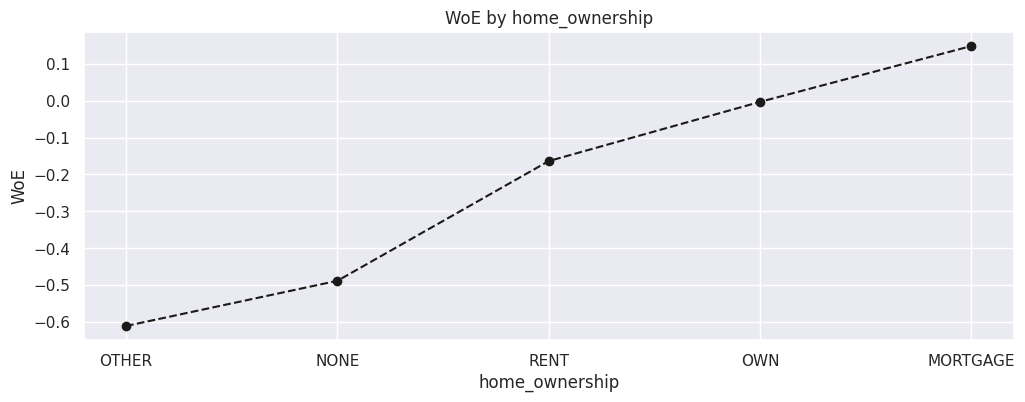

In [458]:
plot_woe(df_temp)

When applying our styler to the WoE dataframe by Home_Ownership, we can see that several buckets have under 10% representation in the data. Hence, we combine the under-represented bins into one bucket with the highest risk classification: OTHER, NONE, ANY, OWN.

Below, we create a tuple that contains:
1. **first element:** The name of the variable of interest
2. **second element:** A dictionary containing the new mapping for the categories of that variable.

In [459]:
home_ownership_bin_map = ('home_ownership', 
                          {'OTHER': 'Othr_Own_Any',
                           'OWN': 'Othr_Own_Any',
                           'ANY': 'Othr_Own_Any',
                           'RENT': 'RENT',
                           'OWN': 'OWN',
                           'MORTGAGE': 'MORTGAGE'}
                         )

We now create a **create_dummies()** function that:
- takes as input our training data and the new mapping of the variable categories
- creates a new variable with our new mapping
- creates dummy variable based on the categories in the new variable.

In [460]:
def create_dummies(df_X, bin_mapping):
    var = bin_mapping[0]
    bin_mapping = bin_mapping[1]

    
    # Apply the bin mapping to the original data to create a new variable that reflects the merged bins

    import pandas.api.types as ptypes
    if ptypes.is_numeric_dtype(df_X[var]):
        df_X[f'cc_{var}'] = df_X[var].map(bin_mapping) 
    else:
        df_X[f'cc_{var}'] = df_X[var].astype(str).map(bin_mapping) # Add as type(str) if not numeric

    # Create dummy variables for the new coarse-classed bins
    dummies = pd.get_dummies(df_X[f'cc_{var}'], prefix=f'{var}:')

    # Return the modified DataFrame with dummy variables, the original WoE table, and the bin mapping dictionary
    return dummies

In [461]:
Home_Ownership_train_dummies = create_dummies(X_train, home_ownership_bin_map)
Home_Ownership_test_dummies = create_dummies(X_test, home_ownership_bin_map)

# Dictionary to store dummy DataFrames
dummies_train_dict['Home_Ownership'] = Home_Ownership_train_dummies
dummies_test_dict['Home_Ownership'] = Home_Ownership_test_dummies

# Add chosen reference category to a dedicated list
if Home_Ownership_train_dummies.columns.values[0] not in ref_categories:
    ref_categories.append(Home_Ownership_train_dummies.columns.values[0])

Home_Ownership_test_dummies.shape

/tmp/ipykernel_577096/4085234038.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X[f'cc_{var}'] = df_X[var].astype(str).map(bin_mapping) # Add as type(str) if not numeric
/tmp/ipykernel_577096/4085234038.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X[f'cc_{var}'] = df_X[var].astype(str).map(bin_mapping) # Add as type(str) if not numeric


(93257, 4)

<br>

#### **Processing: **addr_state** (Discrete)**

In [462]:
X_train.addr_state.unique()

array(['OK', 'TN', 'DC', 'MI', 'IN', 'OR', 'IL', 'CA', 'PA', 'KY', 'VA',
       'NY', 'OH', 'NH', 'DE', 'NJ', 'CO', 'AR', 'FL', 'NC', 'MA', 'TX',
       'RI', 'MD', 'MN', 'WV', 'WA', 'SC', 'HI', 'LA', 'NM', 'GA', 'MO',
       'MS', 'KS', 'WY', 'CT', 'WI', 'UT', 'AZ', 'MT', 'AL', 'AK', 'SD',
       'NV', 'VT', 'ME', 'NE', 'IA', 'ID'], dtype=object)

In [463]:
df_temp = woe_discrete(X_train, 'addr_state', y_train)
df_temp.head()

,addr_state,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,NE,10,0.0000,4,6,0.0000,0.0001,-2.5035,NaN,NaN,inf
1,NV,5204,0.0140,4484,720,0.0135,0.0177,-0.2690,0.0135,2.2345,inf
2,HI,1968,0.0053,1718,250,0.0052,0.0061,-0.1705,0.0083,0.0984,inf
3,FL,25223,0.0676,22058,3165,0.0664,0.0776,-0.1565,0.0612,0.0141,inf
4,ID,8,0.0000,7,1,0.0000,0.0000,-0.1521,0.0664,0.0044,inf


We can see below that 33 states have representation proportion of less than 5%.

In [464]:
under_rep = df_temp.loc[df_temp.prop_n < 0.02, 'prop_n'].count()
print(f"Number of under_represented states is {under_rep}")

Number of under_represented states is 33


Since we now have a large number of categories, we will update our plotting function for WoE vs categories in order to bring additional information that will help us in coarse classing. The function *plot_woe2* adds to the graph information about the number and percentage of observations within each category. This will help us determine which categories should be combined with more visual ease.

In [465]:
def plot_woe2(df_woe, x_axis_rotation=0, v_space = 0.1):
    plt.figure(figsize=(12, 4))
    
    cmap = plt.cm.viridis  # Colormap for points

    # Scatter plot with color coding based on n_prop
    plt.plot(df_woe[df_woe.columns.values[0]], df_woe['WoE'], linestyle='--', color='gray', zorder=1)
    scatter = plt.scatter(df_woe[df_woe.columns.values[0]], df_woe['WoE'], c=df_woe['prop_n'], 
                         cmap=cmap, s=100, edgecolors='k', zorder=2)

    # Adding text annotations for each point
    for i, row in df_woe.iterrows():
        plt.text(row[df_woe.columns.values[0]], row['WoE']+v_space, f"{row['prop_n']*100:.0f}%", 
                ha='center', va='bottom', fontsize=7)

    plt.xlabel(df_woe.columns.values[0])
    plt.ylabel('WoE')
    plt.title('WoE by ' + df_woe.columns.values[0])
    plt.xticks(rotation = x_axis_rotation, fontsize = 9)

    # Colorbar to the scatter plot
    plt.colorbar(scatter, ax=plt.gca(), label='Proportion (prop_n)')
    plt.show()


We run the plotting function twice on our WoE data for the variable *addr_state*. In the first run, we see that we have large dispersion in WoE values for the first and last few categories due to low number of observations. Hence, we run the function a second time excluding these categories as we will later combine them into the first bucket (the one with lowest WoE).

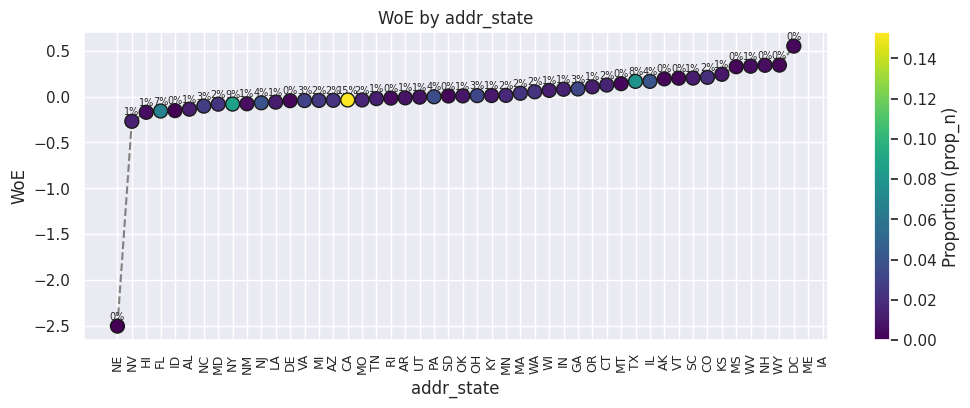

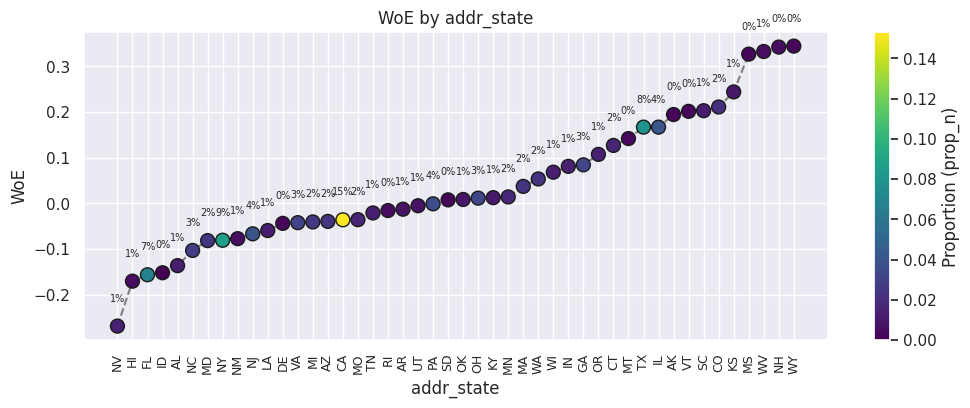

In [466]:
plot_woe2(df_temp, 90, v_space = 0.05)
plot_woe2(df_temp[1:-3], 90, v_space = 0.05)

In order to produce a coarsed version of the **addr_state** variable, we follow the following grouping rules:
- States that have negligible representation in the data (less than 10 or 0.001%) will be grouped into the riskiest bin.
- States that have a relatively large representation will have their own bins.
- States with similar WoE will be merged into one bucket.

Following the rules above, we write the following tuple comprised of:
1. Name of our variable as first element
2. List of states grouped into lists following the rules above.

In [467]:
state_coarsed = ('addr_state',
                  [['NE', 'ID', 'ME', 'IA', 'NV', 'HI'],
                   ['FL'],
                   ['AL'],
                   ['NC'],
                   ['MD'],
                   ['NY'],
                   ['NM', 'NJ', 'LA', 'DE', 'VA', 'MI', 'AZ'],
                   ['CA'],
                   ['MO', 'TN', 'RI', 'AR', 'UT', 'PA', 'SD', 'OK', 'OH', 'KY', 'MN'],
                   ['MA', 'WA', 'WI', 'IN', 'GA'],
                   ['OR', 'CT', 'MT'],
                   ['TX'],
                   ['IL', 'AK', 'VT', 'SC', 'CO', 'KS', 'MS', 'WV', 'NH', 'WY', 'DC']])

We will define another function called **bin_mapping()** that will take the outcomes of the *coarse_classing()* function (i.e. list of categories grouped as sublists for each bin), and returns a dictionary which will be used to map the original categories in our dataframe into their new respective bins. This will help us in:
1. Ensuring that our binning was effective in achieving linear relationship between the new bins and the WoE
2. Creating dummy variables for the variable of interest based on the new binning.

In [468]:
def bin_mapping(coarsed_var): # This function will use the coarsed bins to create a map for dummy variables
    var = coarsed_var[0]
    merged_bins = coarsed_var[1]
    
    # Create a dictionary mapping original category values to their corresponding merged bin
    bin_mapping = {}
    for idx, bin_group in enumerate(merged_bins):
        # Create a descriptive bin name: variable_name:category1_category2_etc
        bin_name = '_'.join(['-'.join(str(word)[:4] for word in i.split('_')) for i in bin_group]) # Name the bins by initials
        #bin_name = f"bin_{idx+1}" # Name the bins as bin_1, 2, ...etc
        
        # Map each category in the group to the descriptive bin name
        for value in bin_group:
            bin_mapping[value] = bin_name

    return(var, bin_mapping)


In [469]:
state_bin_map = bin_mapping(state_coarsed)

For testing purposes, we run the *bin_mapping()* function to ensure to check the impact of our coarse_classing solution on the monotonicity and stability of WoE trend vis-a-vis the new bins.
The plot below shows that our coarse-classing solution helped improve the monotonicity and stability of WoE against the new bins of our *addr_state* variable.

In [470]:
X_train['new_bins'] = X_train['addr_state'].astype(str).map(state_bin_map[1])
df_temp = woe_discrete(X_train, 'new_bins', y_train)
df_temp.head()

/tmp/ipykernel_577096/2804805922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['new_bins'] = X_train['addr_state'].astype(str).map(state_bin_map[1])


,new_bins,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,NE_ID_ME_IA_NV_HI,7202,0.0193,6225,977,0.0187,0.0240,-0.2462,NaN,NaN,0.0125
1,FL,25223,0.0676,22058,3165,0.0664,0.0776,-0.1565,0.0477,0.0897,0.0125
2,AL,4720,0.0127,4138,582,0.0125,0.0143,-0.1365,0.0539,0.0200,0.0125
3,NC,10129,0.0272,8916,1213,0.0268,0.0298,-0.1032,0.0144,0.0333,0.0125
4,MD,8808,0.0236,7773,1035,0.0234,0.0254,-0.0817,0.0034,0.0215,0.0125


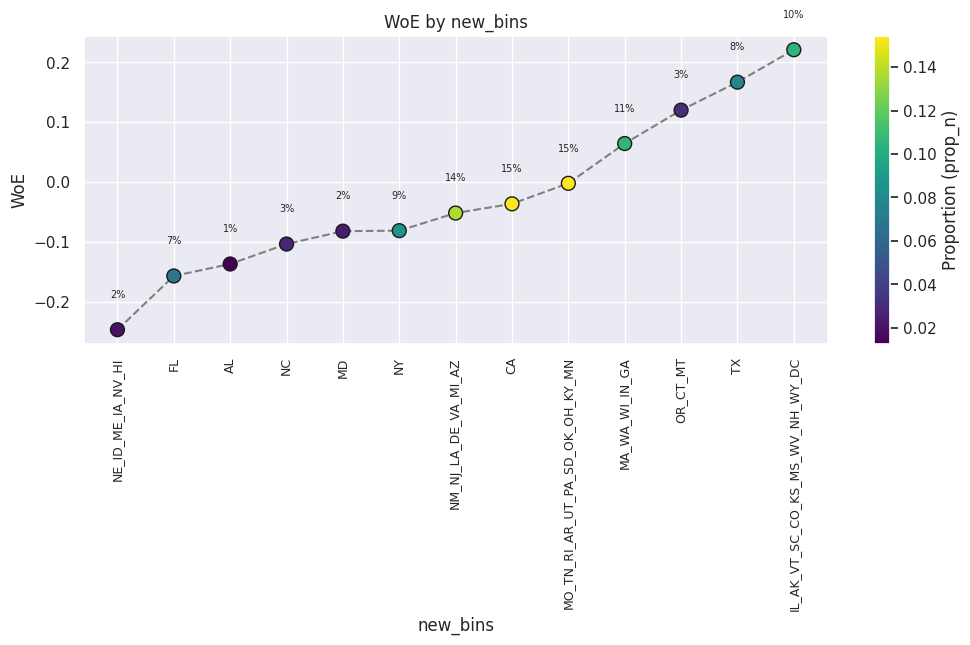

In [471]:
plot_woe2(df_temp, 90, v_space = 0.05)

- Creating dummy variables for variable **addr_state**

In [472]:
X_test['cc_addr_state'] = X_test['addr_state'].astype(str).map(state_bin_map[1])

state_train_dummies = create_dummies(X_train, state_bin_map)
state_test_dummies = create_dummies(X_test, state_bin_map)

# Dictionary to store dummy DataFrames
dummies_train_dict['addr_state'] = state_train_dummies
dummies_test_dict['addr_state'] = state_test_dummies

# Add chosen reference category to a dedicated list
if state_train_dummies.columns.values[0] not in ref_categories:
    ref_categories.append(state_train_dummies.columns.values[0])

state_test_dummies.shape

/tmp/ipykernel_577096/3113759663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['cc_addr_state'] = X_test['addr_state'].astype(str).map(state_bin_map[1])
/tmp/ipykernel_577096/4085234038.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X[f'cc_{var}'] = df_X[var].astype(str).map(bin_mapping) # Add as type(str) if not numeric
/tmp/ipykernel_577096/4085234038.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

(93257, 13)

<br>

#### **Processing: **verification_status** (Discrete)**

In [473]:
df_temp = woe_discrete(X_train, 'verification_status', y_train)
df_temp

,verification_status,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,Verified,134412,0.3603,117256,17156,0.3529,0.4208,-0.1760,NaN,NaN,0.0212
1,Source Verified,120007,0.3217,107576,12431,0.3238,0.3049,0.0600,0.0291,0.2360,0.0212
2,Not Verified,118609,0.3180,107427,11182,0.3233,0.2743,0.1645,0.0004,0.1045,0.0212


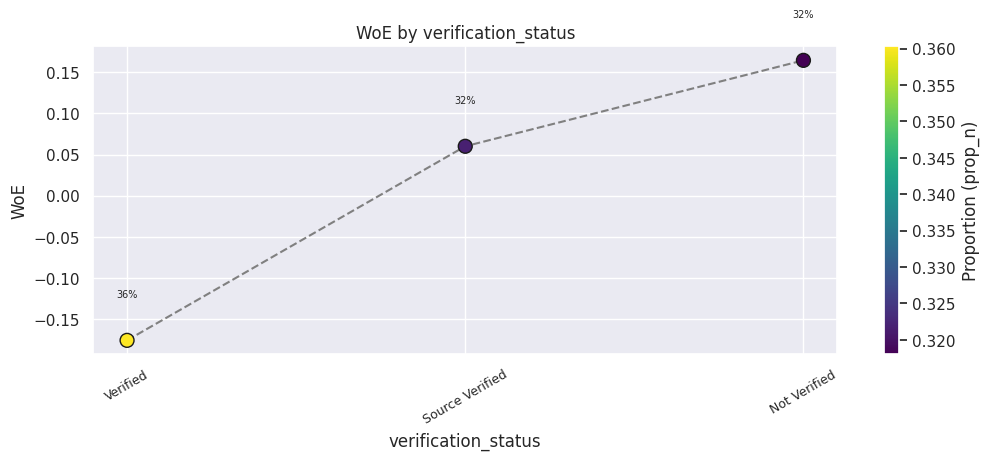

In [474]:
plot_woe2(df_temp, 30, v_space = 0.05)

In [475]:
Verifi_status_train_dummies = pd.get_dummies(X_train.verification_status, prefix ='verif:' )
Verifi_status_test_dummies = pd.get_dummies(X_test.verification_status, prefix ='verif:' )

# Dictionary to store dummy DataFrames
dummies_train_dict['verification_status'] = Verifi_status_train_dummies
dummies_test_dict['verification_status'] = Verifi_status_test_dummies


# Add chosen reference category to a dedicated list
if Verifi_status_train_dummies.columns.values[0] not in ref_categories:
    ref_categories.append(Verifi_status_train_dummies.columns.values[0])


Verifi_status_test_dummies.shape

(93257, 3)

<br>

#### **Processing: **Purpose** (Discrete)**

In [476]:
df_temp = woe_discrete(X_train, 'purpose', y_train)
df_temp.head()

,purpose,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,small_business,5638,0.0151,4432,1206,0.0133,0.0296,-0.7965,NaN,NaN,0.0371
1,educational,340,0.0009,272,68,0.0008,0.0017,-0.7117,0.0125,0.0848,0.0371
2,renewable_energy,280,0.0008,232,48,0.0007,0.0012,-0.5225,0.0001,0.1892,0.0371
3,moving,2410,0.0065,2048,362,0.0062,0.0089,-0.3650,0.0055,0.1574,0.0371
4,house,1786,0.0048,1530,256,0.0046,0.0063,-0.3101,0.0016,0.0549,0.0371


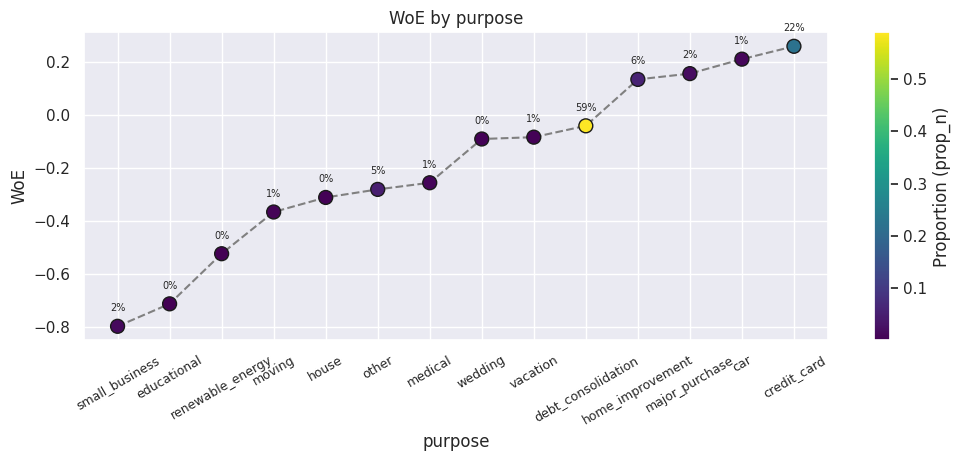

In [477]:
plot_woe2(df_temp, 30, v_space = 0.05)

As previously done, we write a mapping tuple comprised of:
1. Name of our variable as first element
2. List of states grouped into lists following the coarse_classing rules mentioned earlier.

In [478]:
purpose_coarsed = ('purpose',
                   [['educational','renewable_energy', 'moving', 'house', 'medical', 'wedding', 'vacation', 'small_business'],
                    ['other'],
                    ['debt_consolidation'],
                    ['home_improvement'],
                    ['major_purchase', 'car'],
                    ['credit_card']])

In [479]:
purpose_bin_map = bin_mapping(purpose_coarsed)

/tmp/ipykernel_577096/4224066226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['new_bins'] = X_train['purpose'].astype(str).map(purpose_bin_map[1])


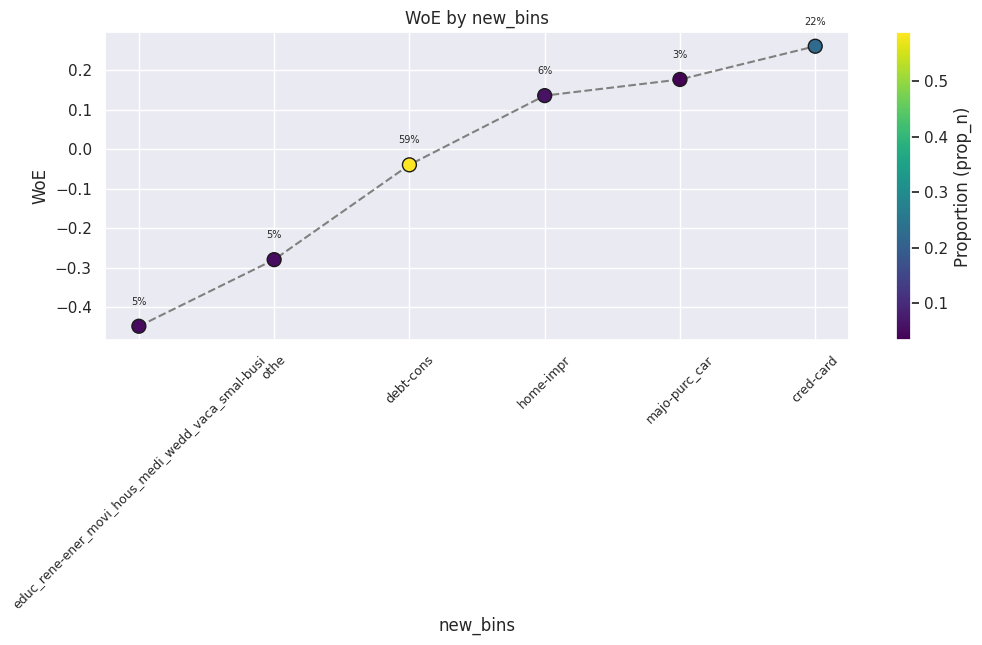

In [480]:
X_train['new_bins'] = X_train['purpose'].astype(str).map(purpose_bin_map[1])
df_temp = woe_discrete(X_train, 'new_bins', y_train)
plot_woe2(df_temp, 45, v_space = 0.05)

We finally create the dummy variables for the coarse-classed variable.

In [481]:
X_test['new_bins'] = X_test['purpose'].astype(str).map(purpose_bin_map[1])

purpose_train_dummies = create_dummies(X_train, purpose_bin_map)
purpose_test_dummies = create_dummies(X_test, purpose_bin_map)


# Dictionary to store dummy DataFrames
dummies_train_dict['purpose'] = purpose_train_dummies
dummies_test_dict['purpose'] = purpose_test_dummies

# Add chosen reference category to a dedicated list
if purpose_train_dummies.columns.values[0] not in ref_categories:
    ref_categories.append(purpose_train_dummies.columns.values[0])

purpose_test_dummies.shape

/tmp/ipykernel_577096/351669465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['new_bins'] = X_test['purpose'].astype(str).map(purpose_bin_map[1])
/tmp/ipykernel_577096/4085234038.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X[f'cc_{var}'] = df_X[var].astype(str).map(bin_mapping) # Add as type(str) if not numeric
/tmp/ipykernel_577096/4085234038.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

(93257, 6)

<br>

#### **Processing: **initial_list_status** (Discrete)**

In [482]:
X_train.initial_list_status.unique()

array(['f', 'w'], dtype=object)

In [483]:
df_temp = woe_discrete(X_train, 'initial_list_status', y_train)
df_temp.head()

,initial_list_status,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,f,242537,0.6502,213387,29150,0.6422,0.715,-0.1073,NaN,NaN,0.0244
1,w,130491,0.3498,118872,11619,0.3578,0.285,0.2274,0.2845,0.3348,0.0244


In [484]:
initial_list_status_train_dummies = pd.get_dummies(X_train['initial_list_status'], prefix = 'init_list_status:')
initial_list_status_test_dummies = pd.get_dummies(X_test['initial_list_status'], prefix = 'init_list_status:')

dummies_train_dict['initial_list_status'] = initial_list_status_train_dummies
dummies_test_dict['initial_list_status'] = initial_list_status_test_dummies

# Add chosen reference category to a dedicated list
if initial_list_status_train_dummies.columns.values[0] not in ref_categories:
    ref_categories.append(initial_list_status_train_dummies.columns.values[0])

initial_list_status_test_dummies.shape

(93257, 2)

<br>

### **Processing Continuous Variables**


The pre-processing of continuous variables is comprised of the following steps:
- Fine-classing the variable into categorical bins *(This is only requried for continuous variables)*.
- Calculating the Weight of Evidence (WoE) associated with each of the generated categories.
- Coarse-classing the generated categories into fewer categories with similar weight of evidence (WoE).
- Creating dummy variables based on the final categories of the coarse-classed variable.

- **Function to process Continuous Variables**

We have previously created a function to automate the process of calculating the WoE for the different categories of a categorical variable. We will create a similar function for calculating the WoE for a fine-classed continuous variable. The only difference here is that the bins will not be ordered by WoE as the order of these bins matter.

In [485]:
def woe_continuous(df_X, var, target_df):
    df = pd.concat([df_X[var], target_df], axis = 1)
    df = df.groupby(var, as_index=False, observed=False).agg(
        n = ('good_bad', lambda x: x.count()), # count of observations per category
        prop_n = ('good_bad', lambda x: x.count()/len(df[var])), # proportion of observations in category to total
        good_count=('good_bad', lambda x: (x == 0).sum()), # count of good in category X
        bad_count=('good_bad', lambda x: (x == 1).sum()), # count of bad in category x
        prop_good = ('good_bad', lambda x: (x == 0).sum() / sum(df.good_bad == 0)), # proportion of good in category x to all good
        prop_bad = ('good_bad', lambda x: (x == 1).sum()/ sum(df.good_bad == 1)) # proportion of bad in category x to all bad
    )

    df['WoE'] = np.log(df.prop_good / df.prop_bad) # Calculating WoW ln(%good / %bad)
    
    # TURN OFF SORTING
    #df = df.sort_values(by = 'WoE').reset_index(drop = True) 

    
    df['diff_prop_good'] = df['prop_good'].diff().abs() # absolute diff in %good
    df['diff_woe'] = df['WoE'].diff() # absolute diff in WoE
    
     # IV = Sum[ (%good - % bad) * WoE ]
    df['IV'] = (df.prop_good - df.prop_bad)* df.WoE
    df['IV'] = sum(df.IV)

    return(df.round(4))


<br>

#### **Processing: **initial_list_status** (Ordinal)**

In [486]:
X_train.term_int.unique()

array([36, 60])

We calculate the WoE for the two categories of our variable and also plot the WoE trend. It can be noted below that loans with 60 months term are associated with higher odds of being in default.

In [487]:
df_temp = woe_continuous(X_train, 'term_int' ,y_train)
df_temp

,term_int,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,36,270387,0.7248,244114,26273,0.7347,0.6444,0.1311,NaN,NaN,0.0383
1,60,102641,0.2752,88145,14496,0.2653,0.3556,-0.2929,0.4694,-0.424,0.0383


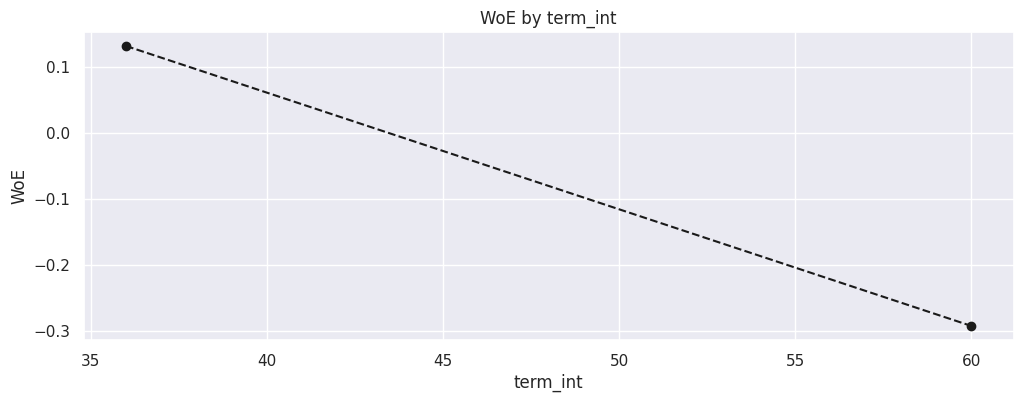

In [488]:
plot_woe(df_temp)

In [489]:
term_train_dummies = pd.get_dummies(X_train['term_int'], prefix = 'term:')
term_test_dummies = pd.get_dummies(X_test['term_int'], prefix = 'term:')

# Dictionary to store dummy DataFrames
dummies_train_dict['term_int'] = term_train_dummies
dummies_test_dict['term_int'] = term_test_dummies

# Add chosen reference category to a dedicated list
if term_test_dummies.columns.values[-1] not in ref_categories:
    ref_categories.append(term_test_dummies.columns.values[-1])

term_test_dummies.shape

(93257, 2)

<br>

#### **Processing: **emp_length_int** (Ordinal)**

In [490]:
X_train['emp_length_int'].unique()

array([ 0.,  2., 10.,  1.,  9.,  6.,  3.,  7.,  5.,  8.,  4.])

In [491]:
df_temp = woe_continuous(X_train, 'emp_length_int' ,y_train)
df_temp

,emp_length_int,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,0.0,45884,0.1230,40203,5681,0.1210,0.1393,-0.1412,NaN,NaN,0.0065
1,1.0,23753,0.0637,21099,2654,0.0635,0.0651,-0.0248,0.0575,0.1163,0.0065
2,2.0,33010,0.0885,29360,3650,0.0884,0.0895,-0.0131,0.0249,0.0117,0.0065
3,3.0,29377,0.0788,26198,3179,0.0788,0.0780,0.0111,0.0095,0.0242,0.0065
4,4.0,22304,0.0598,19818,2486,0.0596,0.0610,-0.0221,0.0192,-0.0332,0.0065
5,5.0,24538,0.0658,21753,2785,0.0655,0.0683,-0.0425,0.0058,-0.0204,0.0065
6,6.0,20797,0.0558,18363,2434,0.0553,0.0597,-0.0772,0.0102,-0.0347,0.0065
7,7.0,20873,0.0560,18580,2293,0.0559,0.0562,-0.0058,0.0007,0.0714,0.0065
8,8.0,17913,0.0480,15927,1986,0.0479,0.0487,-0.0161,0.0080,-0.0103,0.0065
9,9.0,14410,0.0386,12769,1641,0.0384,0.0403,-0.0463,0.0095,-0.0302,0.0065


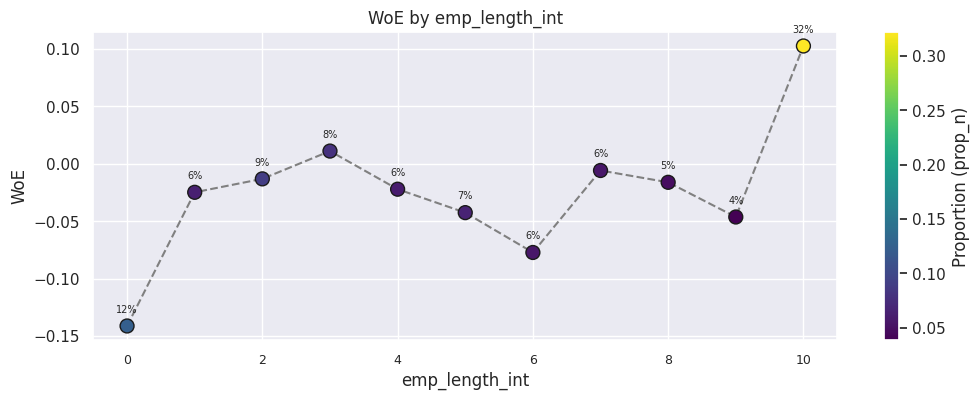

In [492]:
plot_woe2(df_temp, v_space = 0.01)

We use this function on our newly grouped categories (It arranges the names of the bins as intervals- since we are dealing with discrete numeric variables)

In [493]:
def bin_numeric_column(df, col_name, bin_thresholds):
    bins = [-np.inf] + bin_thresholds + [np.inf]  # Ensure open-ended bins
    df[f"Factor_{col_name}"] = pd.cut(df[col_name], bins=bins)
    return df

In [494]:
emp_length_coarsed = ('emp_length_int',
                              [0, 1, 4, 8, 9, 10])

X_train = bin_numeric_column(X_train, emp_length_coarsed[0], emp_length_coarsed[1])
X_test = bin_numeric_column(X_test, emp_length_coarsed[0], emp_length_coarsed[1])

/tmp/ipykernel_577096/3208832350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Factor_{col_name}"] = pd.cut(df[col_name], bins=bins)
/tmp/ipykernel_577096/3208832350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Factor_{col_name}"] = pd.cut(df[col_name], bins=bins)


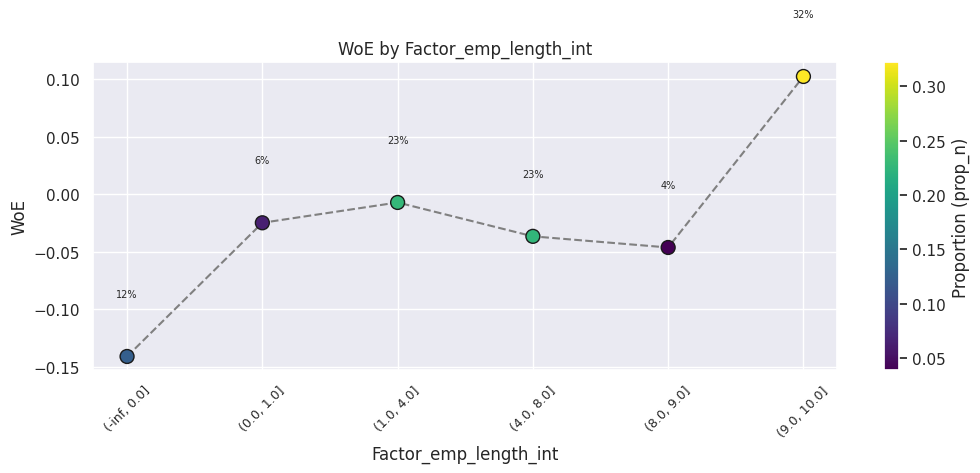

In [495]:
df_temp = woe_continuous(X_train, 'Factor_emp_length_int', y_train)
# We need to convert duration intervals to strings because Matplotlib does not support pandas.Interval objects directly in plt.plot()
df_temp['Factor_emp_length_int'] = df_temp['Factor_emp_length_int'].astype(str)
plot_woe2(df_temp, 45, v_space = 0.05)

In [496]:
empLength_train_dummies = pd.get_dummies(X_train['Factor_emp_length_int'], prefix = 'empLength: ')
empLength_test_dummies = pd.get_dummies(X_test['Factor_emp_length_int'], prefix = 'empLength: ')


# Dictionary to store dummy DataFrames
dummies_train_dict['emp_length_int'] = empLength_train_dummies
dummies_test_dict['emp_length_int'] = empLength_test_dummies

# Add chosen reference category to a dedicated list
if empLength_train_dummies.columns.values[0] not in ref_categories:
    ref_categories.append(empLength_train_dummies.columns.values[0])

#Test index matching of dummies with test_data
empLength_test_dummies.shape

(93257, 7)

<br>

#### **Processing: **mths_since_issue_d** (Ordinal)**

In [497]:
X_train.mths_since_issue_d.unique()

array([ 65,  44,  52,  39,  45,  83,  63,  62,  50,  58,  48,  47,  38,
        40,  66,  55,  57,  69,  86,  59,  41,  87,  46,  54,  42,  67,
        71,  49,  53,  51,  60,  56,  64,  74,  94,  37,  43,  84,  61,
        76,  90,  82,  93,  77,  80,  92,  70,  96,  81,  99,  88,  78,
        85, 102,  95,  79,  72,  89, 120,  97,  73,  91, 106,  75, 115,
       105, 119, 121,  98, 127, 104, 108, 111, 100, 118, 109, 117, 124,
       107, 113, 112, 101, 103, 110, 116, 114, 122, 125, 126, 123, 128])

In [498]:
X_train['Factor_mths_since_issue_d'] = pd.cut(X_train['mths_since_issue_d'], 50)

/tmp/ipykernel_577096/1506966147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Factor_mths_since_issue_d'] = pd.cut(X_train['mths_since_issue_d'], 50)


In [499]:
X_train['Factor_mths_since_issue_d'].head()

204810     (64.3, 66.12]
393866    (42.46, 44.28]
88866     (51.56, 53.38]
277627    (38.82, 40.64]
411898     (44.28, 46.1]
Name: Factor_mths_since_issue_d, dtype: category
Categories (50, interval[float64, right]): [(36.909, 38.82] < (38.82, 40.64] < (40.64, 42.46] < (42.46, 44.28] ... (120.72, 122.54] < (122.54, 124.36] < (124.36, 126.18] < (126.18, 128.0]]

In [500]:
df_temp = woe_continuous(X_train, 'Factor_mths_since_issue_d' ,y_train)
df_temp.head()

,Factor_mths_since_issue_d,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,"(36.909, 38.82]",28181,0.0755,26565,1616,0.0800,0.0396,0.7016,NaN,NaN,0.1142
1,"(38.82, 40.64]",39348,0.1055,36556,2792,0.1100,0.0685,0.4741,0.0301,-0.2276,0.1142
2,"(40.64, 42.46]",38588,0.1034,35412,3176,0.1066,0.0779,0.3134,0.0034,-0.1607,0.1142
3,"(42.46, 44.28]",28992,0.0777,26356,2636,0.0793,0.0647,0.2044,0.0273,-0.1090,0.1142
4,"(44.28, 46.1]",28490,0.0764,25699,2791,0.0773,0.0685,0.1221,0.0020,-0.0824,0.1142


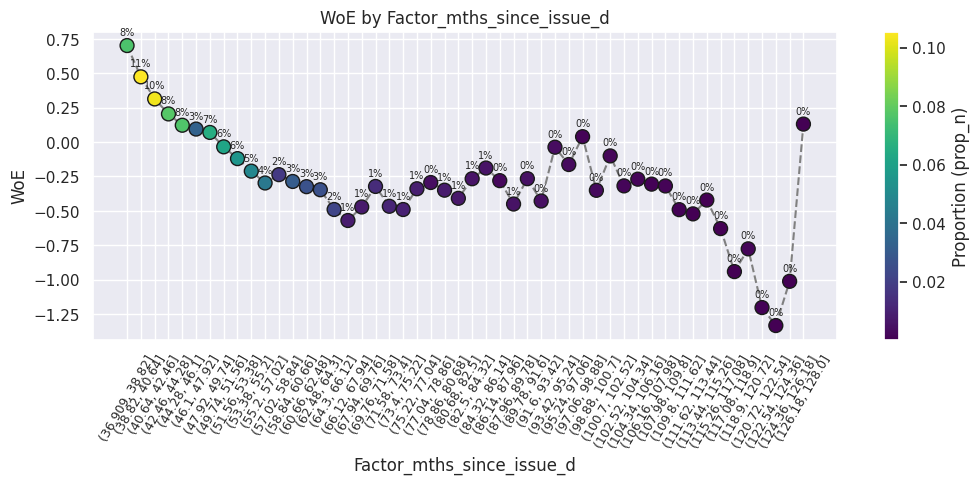

In [501]:
# We need to convert duration intervals to strings because Matplotlib does not support pandas.Interval objects directly in plt.plot()
df_temp['Factor_mths_since_issue_d'] = df_temp['Factor_mths_since_issue_d'].astype(str)
plot_woe2(df_temp, 60, v_space = 0.06)

In [502]:
months_since_issue_coarsed = ('mths_since_issue_d',
                              [0,38, 40, 45, 55, 110])

X_train = bin_numeric_column(X_train, months_since_issue_coarsed[0], months_since_issue_coarsed[1])
X_test = bin_numeric_column(X_test, months_since_issue_coarsed[0], months_since_issue_coarsed[1])

/tmp/ipykernel_577096/3208832350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Factor_{col_name}"] = pd.cut(df[col_name], bins=bins)
/tmp/ipykernel_577096/3208832350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Factor_{col_name}"] = pd.cut(df[col_name], bins=bins)


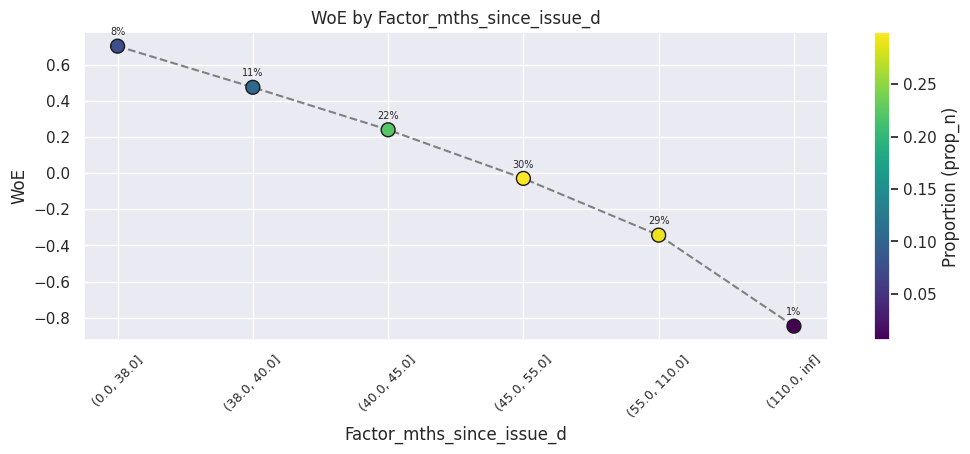

In [503]:
df_temp = woe_continuous(X_train, 'Factor_mths_since_issue_d', y_train)
# We need to convert duration intervals to strings because Matplotlib does not support pandas.Interval objects directly in plt.plot()
df_temp['Factor_mths_since_issue_d'] = df_temp['Factor_mths_since_issue_d'].astype(str)
plot_woe2(df_temp, 45, v_space = 0.05)

In [504]:
mths_since_issue_train_dummies = pd.get_dummies(X_train['Factor_mths_since_issue_d'], prefix = 'mths_sinc_issue:')
mths_since_issue_test_dummies = pd.get_dummies(X_test['Factor_mths_since_issue_d'], prefix = 'mths_sinc_issue:')

# Dictionary to store dummy DataFrames
dummies_train_dict['mths_since_issue_d'] = mths_since_issue_train_dummies
dummies_test_dict['mths_since_issue_d'] = mths_since_issue_test_dummies

# Add chosen reference category to a dedicated list
if mths_since_issue_train_dummies.columns.values[0] not in ref_categories:
    ref_categories.append(mths_since_issue_train_dummies.columns.values[0])

#Test index matching of dummies with test_data
mths_since_issue_test_dummies.shape

(93257, 7)

<br>

#### **Processing: **mths_since_issue_d** (continuous)**

<Axes: >

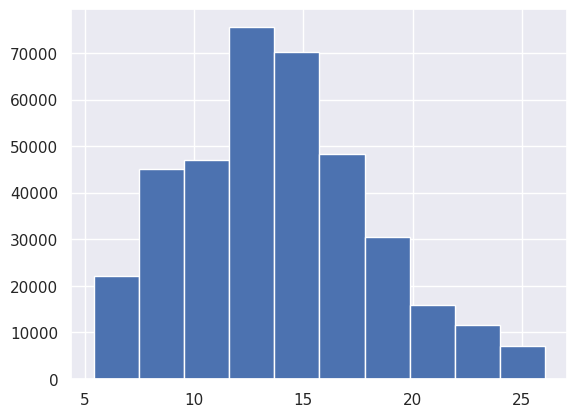

In [505]:
X_train.int_rate.hist()

In [506]:
X_train['Factor_int_rate'] = pd.cut(X_train['int_rate'], bins = range(5,30,5))
df_temp = woe_continuous(X_train, 'Factor_int_rate', y_train)
df_temp

/tmp/ipykernel_577096/3930235407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Factor_int_rate'] = pd.cut(X_train['int_rate'], bins = range(5,30,5))


,Factor_int_rate,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,"(5, 10]",76429,0.2049,73219,3210,0.2204,0.0787,1.0292,NaN,NaN,0.283
1,"(10, 15]",160451,0.4301,145916,14535,0.4392,0.3565,0.2085,0.2188,-0.8207,0.283
2,"(15, 20]",104035,0.2789,88041,15994,0.2650,0.3923,-0.3924,0.1742,-0.6009,0.283
3,"(20, 25]",29561,0.0792,23182,6379,0.0698,0.1565,-0.8076,0.1952,-0.4152,0.283


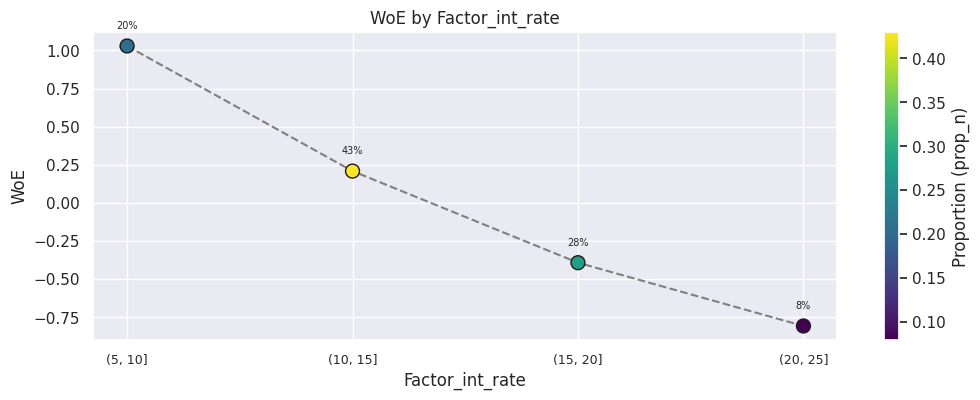

In [507]:
df_temp['Factor_int_rate'] = df_temp['Factor_int_rate'].astype(str)
plot_woe2(df_temp)

In [508]:
X_train['Factor_int_rate'] = pd.cut(X_train['int_rate'], bins = range(5,30,5))
X_test['Factor_int_rate'] = pd.cut(X_test['int_rate'], bins = range(5,30,5))

int_rate_train_dummies = pd.get_dummies(X_train['Factor_int_rate'], prefix = 'int_rate: ')
int_rate_test_dummies = pd.get_dummies(X_test['Factor_int_rate'], prefix = 'int_rate: ')

# Dictionary to store dummy DataFrames
dummies_train_dict['int_rate'] = int_rate_train_dummies
dummies_test_dict['int_rate'] = int_rate_test_dummies

# Add chosen reference category to a dedicated list
if int_rate_train_dummies.columns.values[-1] not in ref_categories:
    ref_categories.append(int_rate_train_dummies.columns.values[-1])

#Test matching indices of test data
pd.concat([int_rate_test_dummies, X_test['Factor_int_rate'], X_test['int_rate']], axis = 1).head(3)

/tmp/ipykernel_577096/2761495930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Factor_int_rate'] = pd.cut(X_train['int_rate'], bins = range(5,30,5))
/tmp/ipykernel_577096/2761495930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Factor_int_rate'] = pd.cut(X_test['int_rate'], bins = range(5,30,5))


,"int_rate: _(5, 10]","int_rate: _(10, 15]","int_rate: _(15, 20]","int_rate: _(20, 25]",Factor_int_rate,int_rate
461982,True,False,False,False,"(5, 10]",9.67
313373,False,True,False,False,"(10, 15]",10.99
205817,False,False,True,False,"(15, 20]",18.75


<br>

#### **Processing: **annual_inc** (continuous)**

In [509]:
X_train.annual_inc.describe().apply(lambda x: f'{x:,.0f}')

count      373,025
mean        73,255
std         54,645
min          1,896
25%         45,000
50%         63,000
75%         88,500
max      7,500,000
Name: annual_inc, dtype: object

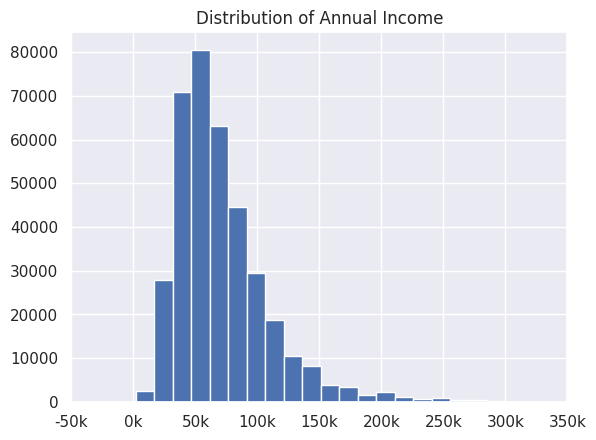

In [510]:
X_train.annual_inc[X_train.annual_inc < 300000].hist(bins = 20)
plt.title('Distribution of Annual Income')


xticks = plt.xticks()[0]  # Extract tick positions
# Manually format x-tick labels to "2,000k" style
formatted_labels = [f"{int(x/1000):,}k" for x in xticks]
# Apply new labels
plt.xticks(xticks, formatted_labels);

Since we have a long tail representing high-income individials, cutting the variable to equally spaced intervals will yield a concentration in the first bin for low-to-mid income borrowers. Hence, we establish a bin for high_income borrowers using a threshold of 100k USD. We also group income levels below 20k into one interval given their low representation in the data. Then we divide the remaining values into 10 equally spaced intervals.

In [511]:
very_low_income_threshold = 20000
high_income_threshold = 100000
num_bins = 20
low_mid_income_threholds = np.round(np.linspace(very_low_income_threshold, high_income_threshold, 10)[1:-1], -3)  # Exclude last element to avoid duplicate
bins = np.concatenate(([0, very_low_income_threshold], low_mid_income_threholds, [high_income_threshold, np.inf]))
labels = [
    f"{int(bins[i] // 1000)}k-{int(bins[i+1] // 1000)}k" if bins[i+1] != np.inf 
    else f"{int(bins[i] // 1000)}k+"
    for i in range(len(bins) - 1)
]


X_train['Factor_annual_inc'] = pd.cut(X_train.annual_inc, bins = bins, labels= labels)

/tmp/ipykernel_577096/2088756316.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Factor_annual_inc'] = pd.cut(X_train.annual_inc, bins = bins, labels= labels)


In [512]:
df_temp = woe_continuous(X_train, 'Factor_annual_inc', y_train)
df_temp

,Factor_annual_inc,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,0k-20k,5648,0.0151,4774,874,0.0144,0.0214,-0.4001,NaN,NaN,0.0548
1,20k-29k,15679,0.0420,13333,2346,0.0401,0.0575,-0.3605,0.0258,0.0397,0.0548
2,29k-38k,35736,0.0958,30749,4987,0.0925,0.1223,-0.2790,0.0524,0.0815,0.0548
3,38k-47k,46601,0.1249,40535,6066,0.1220,0.1488,-0.1985,0.0295,0.0804,0.0548
4,47k-56k,51782,0.1388,45653,6129,0.1374,0.1503,-0.0900,0.0154,0.1086,0.0548
5,56k-64k,35277,0.0946,31204,4073,0.0939,0.0999,-0.0618,0.0435,0.0281,0.0548
6,64k-73k,40373,0.1082,36178,4195,0.1089,0.1029,0.0566,0.0150,0.1184,0.0548
7,73k-82k,32873,0.0881,29632,3241,0.0892,0.0795,0.1150,0.0197,0.0584,0.0548
8,82k-91k,25441,0.0682,23200,2241,0.0698,0.0550,0.2392,0.0194,0.1243,0.0548
9,91k-100k,21649,0.0580,19758,1891,0.0595,0.0464,0.2485,0.0104,0.0092,0.0548


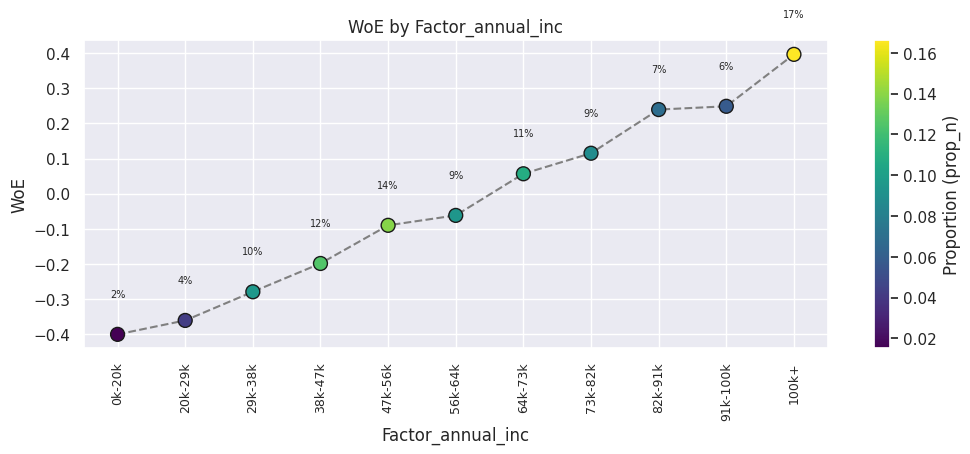

In [513]:
df_temp['Factor_annual_inc'] = df_temp['Factor_annual_inc'].astype(str)
plot_woe2(df_temp, 90)

In [514]:
# Cut only for test_data since we like our result
X_test['Factor_annual_inc'] = pd.cut(X_test.annual_inc, bins = bins, labels= labels)

annual_inc_train_dummies = pd.get_dummies(X_train['Factor_annual_inc'], prefix = 'annual_inc: ')
annual_inc_test_dummies = pd.get_dummies(X_test['Factor_annual_inc'], prefix = 'annual_inc: ')

# Dictionary to store dummy DataFrames
dummies_train_dict['annual_inc'] = annual_inc_train_dummies
dummies_test_dict['annual_inc'] = annual_inc_test_dummies

# Add chosen reference category to a dedicated list
if annual_inc_train_dummies.columns.values[0] not in ref_categories:
    ref_categories.append(annual_inc_train_dummies.columns.values[0])

#Test matching indices of test data
annual_inc_train_dummies.columns.values

/tmp/ipykernel_577096/1706670088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Factor_annual_inc'] = pd.cut(X_test.annual_inc, bins = bins, labels= labels)


array(['annual_inc: _0k-20k', 'annual_inc: _20k-29k',
       'annual_inc: _29k-38k', 'annual_inc: _38k-47k',
       'annual_inc: _47k-56k', 'annual_inc: _56k-64k',
       'annual_inc: _64k-73k', 'annual_inc: _73k-82k',
       'annual_inc: _82k-91k', 'annual_inc: _91k-100k',
       'annual_inc: _100k+'], dtype=object)

<br>

#### **Processing: **mths_since_last_delinq** (Ordinal)**

First off, let us study the distribution and count of missing values of this variable.

Text(0.5, 1.0, 'Months since last delinquency')

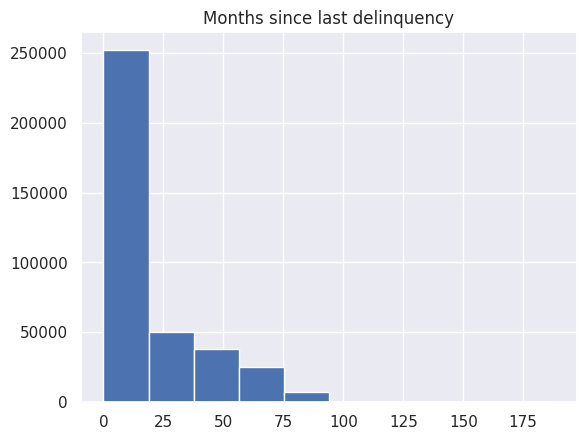

In [515]:
X_train.mths_since_last_delinq.hist()
plt.title('Months since last delinquency')

In [516]:
X_train.mths_since_last_delinq.isnull().value_counts()

mths_since_last_delinq
False    373028
Name: count, dtype: int64

Since we have a very large number of missing values, we will opt for making a bin specific for missing value, then we fine-class the remaining values of the variable.

In [517]:
max_months_threshold = 75
num_bins = 10
bins_threholds = np.round(np.linspace(0, max_months_threshold, 10)[:-1])  # Exclude last element to avoid duplicate
months_bins = np.concatenate((bins_threholds, [max_months_threshold, np.inf]))


X_train['Factor_mths_since_last_delinq'] = pd.cut(X_train.mths_since_last_delinq, bins = months_bins)
X_train['Factor_mths_since_last_delinq'] = X_train['Factor_mths_since_last_delinq'].cat.add_categories('Missing')
X_train['Factor_mths_since_last_delinq'] = X_train['Factor_mths_since_last_delinq'].fillna('Missing')


/tmp/ipykernel_577096/2697570171.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Factor_mths_since_last_delinq'] = pd.cut(X_train.mths_since_last_delinq, bins = months_bins)
/tmp/ipykernel_577096/2697570171.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Factor_mths_since_last_delinq'] = X_train['Factor_mths_since_last_delinq'].cat.add_categories('Missing')
/tmp/ipykernel_577096/2697570171.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [518]:
df_temp = woe_continuous(X_train, 'Factor_mths_since_last_delinq', y_train)
df_temp

,Factor_mths_since_last_delinq,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,"(0.0, 8.0]",18803,0.0504,16703,2100,0.0503,0.0515,-0.0243,NaN,NaN,0.001
1,"(8.0, 17.0]",29282,0.0785,26087,3195,0.0785,0.0784,0.0019,0.0282,0.0262,0.001
2,"(17.0, 25.0]",22821,0.0612,20420,2401,0.0615,0.0589,0.0426,0.0171,0.0408,0.001
3,"(25.0, 33.0]",20796,0.0557,18659,2137,0.0562,0.0524,0.0689,0.0053,0.0263,0.001
4,"(33.0, 42.0]",21545,0.0578,19250,2295,0.0579,0.0563,0.0288,0.0018,-0.0401,0.001
5,"(42.0, 50.0]",16786,0.0450,15038,1748,0.0453,0.0429,0.0541,0.0127,0.0253,0.001
6,"(50.0, 58.0]",12094,0.0324,10818,1276,0.0326,0.0313,0.0395,0.0127,-0.0146,0.001
7,"(58.0, 67.0]",12180,0.0327,10907,1273,0.0328,0.0312,0.0500,0.0003,0.0105,0.001
8,"(67.0, 75.0]",10139,0.0272,8981,1158,0.0270,0.0284,-0.0496,0.0058,-0.0996,0.001
9,"(75.0, inf]",7243,0.0194,6415,828,0.0193,0.0203,-0.0506,0.0077,-0.0010,0.001


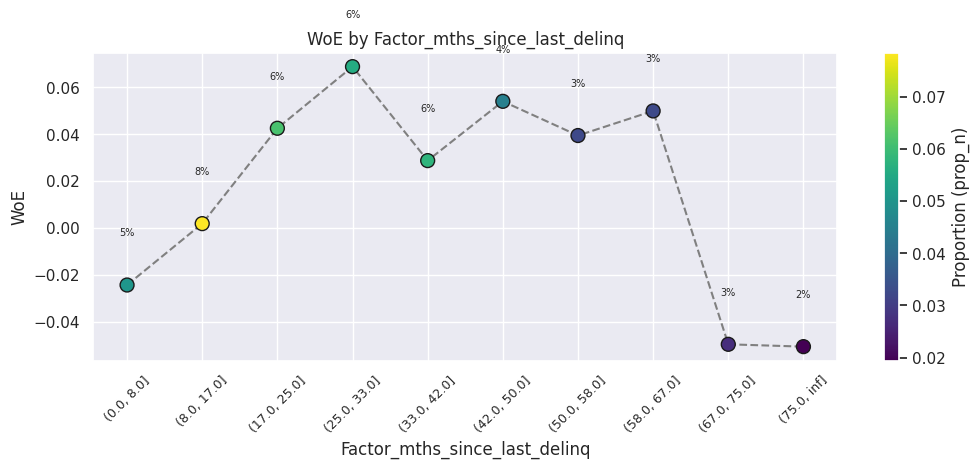

In [519]:
df_temp['Factor_mths_since_last_delinq'] = df_temp['Factor_mths_since_last_delinq'].astype(str)
plot_woe2(df_temp[df_temp['Factor_mths_since_last_delinq'] != 'Missing'], 45, v_space= 0.02)

The WoE does not show a strong monotonous trend for this variable. Hence, we ignore its use in our model.

<br>

#### **Processing: **dti (debt to income ratio)** (% continuous)**

The value of debt to income ratio is given as percentage. We examine the distribution of the variable and check if there are any missing values.

In [520]:
X_train.dti.describe().apply(lambda x: f'{x:.2f}')

count    373028.00
mean         17.21
std           7.85
min           0.00
25%          11.35
50%          16.87
75%          22.78
max          39.99
Name: dti, dtype: object

In [521]:
##Checking count of missing values
X_train.dti.isna().value_counts()

dti
False    373028
Name: count, dtype: int64

Text(0.5, 0, 'DtI (%)')

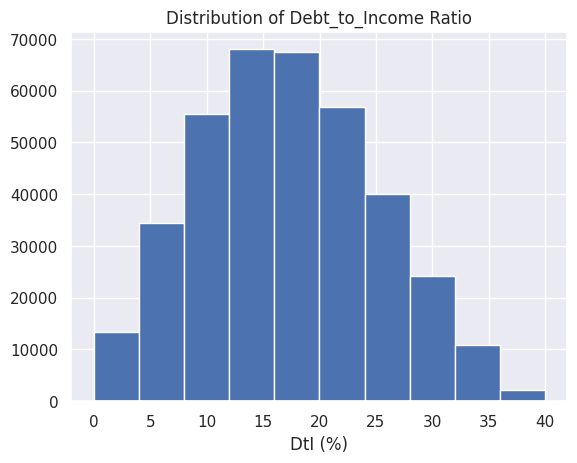

In [522]:
X_train.dti.hist()
plt.title('Distribution of Debt_to_Income Ratio')
plt.xlabel('DtI (%)')

In [523]:
X_train['Fact_DtI'] = pd.cut(X_train.dti, bins = 10)

df_temp = woe_continuous(X_train, 'Fact_DtI', y_train)
df_temp

/tmp/ipykernel_577096/2595516773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fact_DtI'] = pd.cut(X_train.dti, bins = 10)


,Fact_DtI,n,prop_n,good_count,bad_count,prop_good,prop_bad,WoE,diff_prop_good,diff_woe,IV
0,"(-0.04, 3.999]",13387,0.0359,12138,1249,0.0365,0.0306,0.1760,NaN,NaN,0.0257
1,"(3.999, 7.998]",34490,0.0925,31523,2967,0.0949,0.0728,0.2652,0.0583,0.0892,0.0257
2,"(7.998, 11.997]",55560,0.1489,50368,5192,0.1516,0.1274,0.1742,0.0567,-0.0909,0.0257
3,"(11.997, 15.996]",68015,0.1823,61266,6749,0.1844,0.1655,0.1078,0.0328,-0.0664,0.0257
4,"(15.996, 19.995]",67467,0.1809,59962,7505,0.1805,0.1841,-0.0199,0.0039,-0.1277,0.0257
5,"(19.995, 23.994]",56776,0.1522,49788,6988,0.1498,0.1714,-0.1344,0.0306,-0.1146,0.0257
6,"(23.994, 27.993]",40029,0.1073,34854,5175,0.1049,0.1269,-0.1907,0.0449,-0.0563,0.0257
7,"(27.993, 31.992]",24177,0.0648,20952,3225,0.0631,0.0791,-0.2267,0.0418,-0.0360,0.0257
8,"(31.992, 35.991]",10945,0.0293,9476,1469,0.0285,0.0360,-0.2338,0.0345,-0.0071,0.0257
9,"(35.991, 39.99]",2182,0.0058,1932,250,0.0058,0.0061,-0.0531,0.0227,0.1807,0.0257


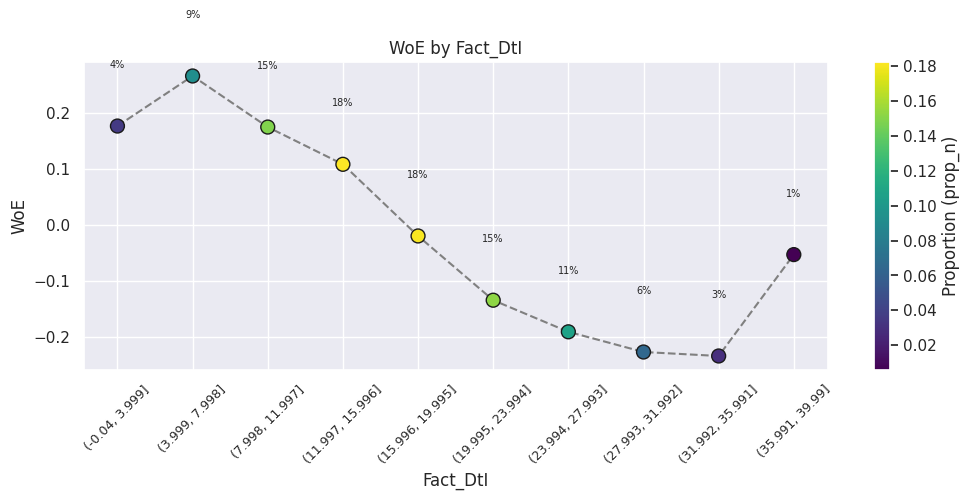

In [524]:
df_temp['Fact_DtI'] = df_temp['Fact_DtI'].astype(str)
plot_woe2(df_temp, 45)

To achieve monotonous binning, we coarse_class the variable with a different cut points.

/tmp/ipykernel_577096/2845181804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fact_DtI'] = pd.cut(X_train.dti, bins = [8, 12, 16, 20, 24, 28, 32, 40])


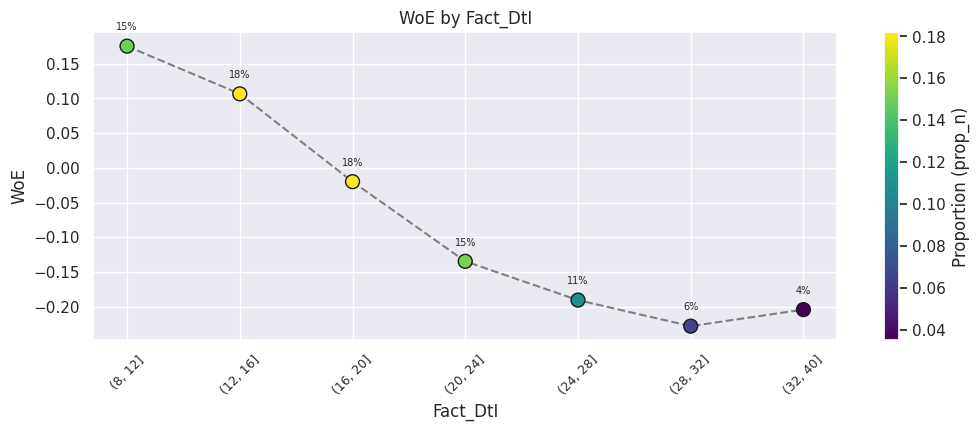

In [525]:
X_train['Fact_DtI'] = pd.cut(X_train.dti, bins = [8, 12, 16, 20, 24, 28, 32, 40])
df_temp = woe_continuous(X_train, 'Fact_DtI', y_train)
df_temp['Fact_DtI'] = df_temp['Fact_DtI'].astype(str)
plot_woe2(df_temp, 45, 0.02)

In [526]:
X_test['Fact_DtI'] = pd.cut(X_test.dti, bins = [8, 12, 16, 20, 24, 28, 32, 40])

dti_train_dummies = pd.get_dummies(X_train['Fact_DtI'], prefix = 'DtI: ')
dti_test_dummies = pd.get_dummies(X_test['Fact_DtI'], prefix = 'DtI: ')

# Dictionary to store dummy DataFrames
dummies_train_dict['dti'] = dti_train_dummies
dummies_test_dict['dti'] = dti_test_dummies

# Add chosen reference category to a dedicated list
if dti_train_dummies.columns.values[0] not in ref_categories:
    ref_categories.append(dti_train_dummies.columns.values[0])

dti_train_dummies.columns.values

/tmp/ipykernel_577096/1628117854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fact_DtI'] = pd.cut(X_test.dti, bins = [8, 12, 16, 20, 24, 28, 32, 40])


array(['DtI: _(8, 12]', 'DtI: _(12, 16]', 'DtI: _(16, 20]',
       'DtI: _(20, 24]', 'DtI: _(24, 28]', 'DtI: _(28, 32]',
       'DtI: _(32, 40]'], dtype=object)

<br>

#### **Processing: **mths_since_last_record** (% ordinal)**

In [527]:
X_train.mths_since_last_record.describe().apply(lambda x: f'{x:.2f}')

count    373028.00
mean         10.00
std          27.71
min           0.00
25%           0.00
50%           0.00
75%           0.00
max         121.00
Name: mths_since_last_record, dtype: object

In [528]:
X_train.mths_since_last_record.isna().value_counts()

mths_since_last_record
False    373028
Name: count, dtype: int64

<Axes: >

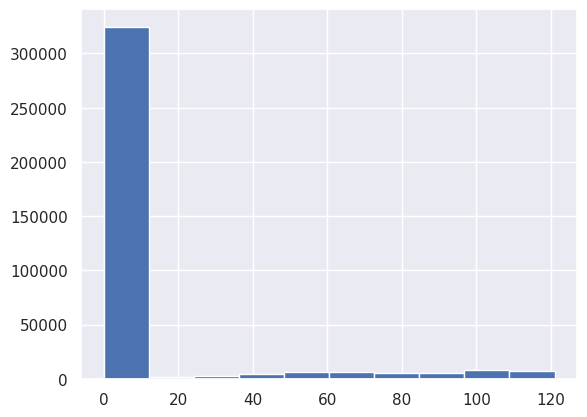

In [529]:
X_train.mths_since_last_record.hist()

/tmp/ipykernel_577096/1912960591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fact_mths_since_last_record'] = pd.cut(X_train.mths_since_last_record, bins = 20)
/tmp/ipykernel_577096/1912960591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fact_mths_since_last_record'] = X_train['Fact_mths_since_last_record'].cat.add_categories('Missing')
/tmp/ipykernel_577096/1912960591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

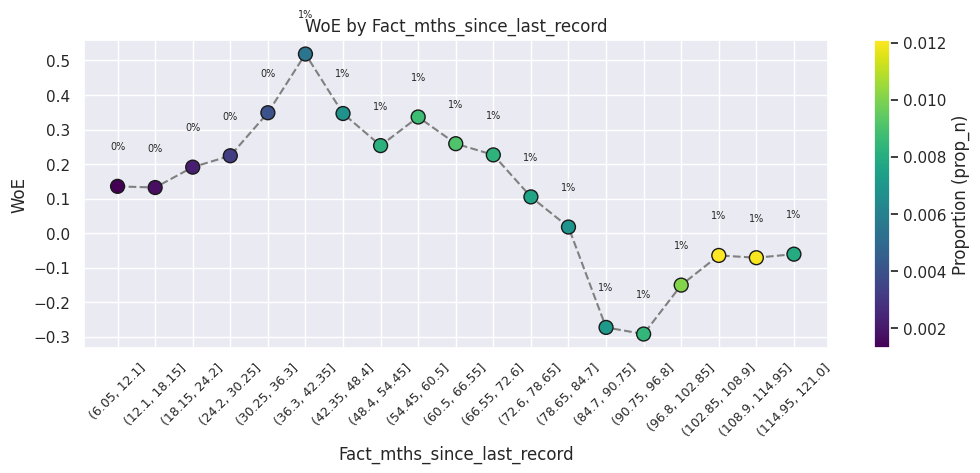

In [530]:
X_train['Fact_mths_since_last_record'] = pd.cut(X_train.mths_since_last_record, bins = 20)
X_train['Fact_mths_since_last_record'] = X_train['Fact_mths_since_last_record'].cat.add_categories('Missing')
X_train['Fact_mths_since_last_record'] = X_train['Fact_mths_since_last_record'].fillna('Missing')
df_temp = woe_continuous(X_train, 'Fact_mths_since_last_record', y_train)
df_temp['Fact_mths_since_last_record'] = df_temp['Fact_mths_since_last_record'].astype(str)
plot_woe2(df_temp[1:-1], 45)

To achieve monotonous binning, we coarse_class the variable with a different cut points.

/tmp/ipykernel_577096/3042760823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fact_mths_since_last_record'] = pd.cut(X_train.mths_since_last_record, bins = bins)
/tmp/ipykernel_577096/3042760823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fact_mths_since_last_record'] = X_train['Fact_mths_since_last_record'].cat.add_categories('Missing')
/tmp/ipykernel_577096/3042760823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

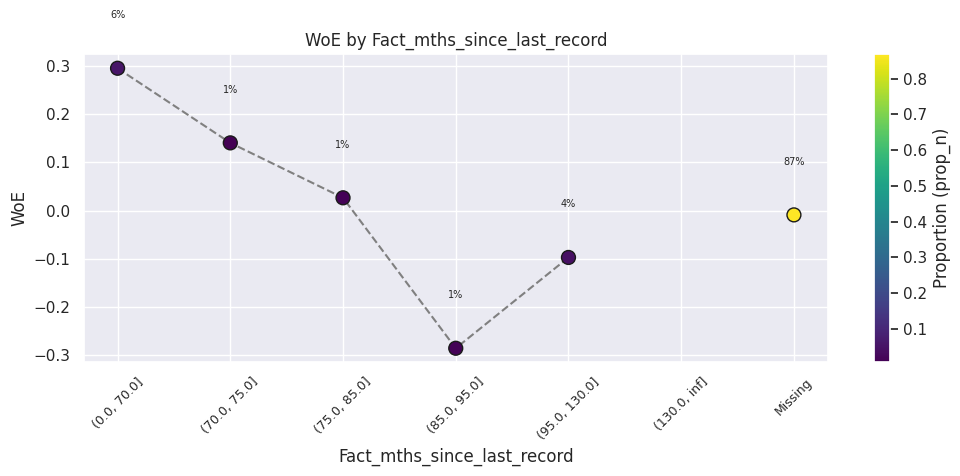

In [531]:
bins = [0, 70, 75, 85, 95, 130, np.inf]
X_train['Fact_mths_since_last_record'] = pd.cut(X_train.mths_since_last_record, bins = bins)
X_train['Fact_mths_since_last_record'] = X_train['Fact_mths_since_last_record'].cat.add_categories('Missing')
X_train['Fact_mths_since_last_record'] = X_train['Fact_mths_since_last_record'].fillna('Missing')
df_temp = woe_continuous(X_train.loc[X_train.mths_since_last_record.isna() == False], 'Fact_mths_since_last_record', y_train)
df_temp['Fact_mths_since_last_record'] = df_temp['Fact_mths_since_last_record'].astype(str)
plot_woe2(df_temp, 45)

In [532]:
X_test['Fact_mths_since_last_record'] = pd.cut(X_test.mths_since_last_record, bins = bins)
X_test['Fact_mths_since_last_record'] = X_test['Fact_mths_since_last_record'].cat.add_categories('Missing')
X_test['Fact_mths_since_last_record'] = X_test['Fact_mths_since_last_record'].fillna('Missing')

mths_since_last_record_train_dummies = pd.get_dummies(X_train['Fact_mths_since_last_record'], prefix = 'mths_last_record: ')
mths_since_last_record_test_dummies = pd.get_dummies(X_test['Fact_mths_since_last_record'], prefix = 'mths_last_record: ')

# Dictionary to store dummy DataFrames
dummies_train_dict['mths_since_last_record'] = mths_since_last_record_train_dummies
dummies_test_dict['mths_since_last_record'] = mths_since_last_record_test_dummies

# Add chosen reference category to a dedicated list
if mths_since_last_record_train_dummies.columns.values[0] not in ref_categories:
    ref_categories.append(mths_since_last_record_train_dummies.columns.values[0])


#Test matching indices of test data
print(mths_since_last_record_train_dummies.columns.values)
print(mths_since_last_record_test_dummies.columns.values)

['mths_last_record: _(0.0, 70.0]' 'mths_last_record: _(70.0, 75.0]'
 'mths_last_record: _(75.0, 85.0]' 'mths_last_record: _(85.0, 95.0]'
 'mths_last_record: _(95.0, 130.0]' 'mths_last_record: _(130.0, inf]'
 'mths_last_record: _Missing']
['mths_last_record: _(0.0, 70.0]' 'mths_last_record: _(70.0, 75.0]'
 'mths_last_record: _(75.0, 85.0]' 'mths_last_record: _(85.0, 95.0]'
 'mths_last_record: _(95.0, 130.0]' 'mths_last_record: _(130.0, inf]'
 'mths_last_record: _Missing']


/tmp/ipykernel_577096/1578519690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fact_mths_since_last_record'] = pd.cut(X_test.mths_since_last_record, bins = bins)
/tmp/ipykernel_577096/1578519690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fact_mths_since_last_record'] = X_test['Fact_mths_since_last_record'].cat.add_categories('Missing')
/tmp/ipykernel_577096/1578519690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

<br>

## **Compiling all dummy variables into final training/test data**

We now create two new dataframes (for training and testing) including only our predictor dummy variables.

In [533]:
X_train_final = pd.concat([X_train[['id']]] + list(dummies_train_dict.values()), axis=1)
X_test_final = pd.concat([X_test[['id']]] + list(dummies_test_dict.values()), axis=1)


# Export data without droping the index as this will be needed when calculating ECL (matching with LGD and EAD data)
X_train_final.to_csv('X_train.csv')
X_test_final.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')



In [534]:
ref_categories


['Grade:_A',
 'home_ownership:_MORTGAGE',
 'addr_state:_AL',
 'verif:_Not Verified',
 'purpose:_cred-card',
 'init_list_status:_f',
 'term:_60',
 'empLength: _(-inf, 0.0]',
 'mths_sinc_issue:_(-inf, 0.0]',
 'int_rate: _(20, 25]',
 'annual_inc: _0k-20k',
 'DtI: _(8, 12]',
 'mths_last_record: _(0.0, 70.0]']